In [2]:
from tensorflow.keras.models import load_model

model = load_model('facs_mobile_net.keras')

model.summary()

c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 184 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 14,863,334 (56.70 MB)

 Trainable params: 4,947,148 (18.87 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 9,894,298 (37.74 MB)

(<matplotlib.image.AxesImage at 0x20812422ea0>, (480, 640))

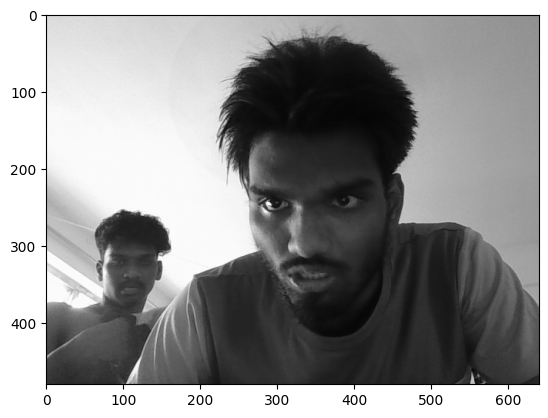

In [2]:
image=np.load('image.npy')
plt.imshow(image,cmap='gray'),image.shape

In [2]:
folder_path = 'frames'  # Replace with your folder path


In [3]:
folders=sorted(os.listdir(folder_path))

In [4]:
paths=[]
for i in tqdm(range(len(folders))):
    files=os.listdir(os.path.join(folder_path,folders[i]))
    files.sort(key=lambda x: int(x.split('.')[0]))
    files=[os.path.join(folder_path,folders[i],files[j]) for j in range(len(files))]
    paths=paths+files

100%|██████████| 27/27 [00:00<00:00, 332.05it/s]


In [5]:
paths[0].split('\\')

['frames', 'RightVideoSN001', '0.jpg']

In [6]:
def get_csv_id(file_path):

    # Extract the filename without extension
    filename = os.path.basename(file_path)  # RightVideoSN001.csv

    # Extract the identifier ('1' or '11')
    if filename.startswith('RightVideoSN'):
        identifier = filename[len('RightVideoSN'):]  # Get '001' or '011'
        identifier = identifier.lstrip('0').split('.')[0]  # Remove leading zeros

    return int(identifier)
def get_id(path):

    # Split the path by '/'
    parts = path.split('\\')

    # Get the directory name that contains the image
    dirname = parts[-2]  # RightVideoSN011

    # Extract the relevant parts from the directory name
    if dirname.startswith('RightVideoSN'):
        identifier = dirname[len('RightVideoSN'):]  # Get SN011 -> 011
        identifier = identifier.lstrip('0')  # Remove leading zeros

    # Get the image number from the filename
    filename = parts[-1]  # 240.jpg
    image_number = os.path.splitext(filename)[0]  # 240

    return int(identifier),int(image_number)

In [7]:
folder_path = 'labels_csv'
csv_path=[]
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        csv_path.append(file_path)
csv_path=sorted(csv_path)
csv={}
for file in csv_path:
    df=pd.read_csv(file)
    ide=get_csv_id(file)
    csv[ide]=df

In [17]:
labels=[]
for file in tqdm(paths):
    ide,image=get_id(file)
    try:
        label=np.array(csv[ide].iloc[image])
        label[label > 0]=1
        labels.append(label)
    except IndexError as e:
        print(f"IndexError occurred: {ide}")
        print(f"Check ide={ide} and image={image} against csv indices.")
labels=np.array(labels)

100%|██████████| 32603/32603 [00:01<00:00, 23208.83it/s]


In [12]:
# frames=[]
# target_size=(224, 224)
# for i in tqdm(range(len(paths))):
#     img=cv2.imread(paths[i],0)
#     resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
#     # # rgb_image = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
#     frames.append(resized_img)
# np.savez('frames.npz',np.array(frames))
frames=np.load('frames.npz')['arr_0']
frames.shape

(32603, 224, 224)

In [13]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

# Parameters for LBP
P = 8  # Number of circularly symmetric neighbor set points
R = 1  # Radius
METHOD = 'uniform'

def calculate_lbp_histogram(image, P=8, R=1, METHOD='uniform', region_size=(18, 16)):
    lbp_image = local_binary_pattern(image, P, R, METHOD)
    regions = [(x, y, region_size[0], region_size[1]) for x in range(0, image.shape[0], region_size[0]) for y in range(0, image.shape[1], region_size[1])]
    histograms = []

    for (x, y, w, h) in regions:
        region = lbp_image[x:x + w, y:y + h]
        hist, _ = np.histogram(region.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
        histograms.extend(hist)
    
    return np.array(histograms)



In [14]:
# lbp=[calculate_lbp_histogram(image) for image in tqdm(frames)]
# np.savez('lbp.npz',np.array(lbp))
lbp=np.load('lbp.npz')['arr_0']
lbp.shape

(32603, 1820)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(lbp,labels,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((26082, 1820), (6521, 1820), (26082, 12), (6521, 12))

In [ ]:
for i in range(labels.shape[1]):
    report = classification_report(y_test[:, i], y_pred[:, i], target_names=['Class 0', 'Class 1'])
    print(f"Classification Report for Label {i}:\n")
    print(report)
    print("\n" + "="*60 + "\n")

# Function to plot the classification report for a single label
def plot_classification_report(label_index):
    report = classification_report(y_test[:, label_index], y_pred[:, label_index], target_names=['Class 0', 'Class 1'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='viridis', fmt='.2f')
    plt.title(f"Classification Report for Label {label_index}")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
    plt.show()

# Plot classification report for a sample label (e.g., label 0)
plot_classification_report(0)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input layer
model.add(Dense(512, input_shape=(1820,), activation='relu'))
model.add(Dropout(0))  # Dropout for regularization

# Hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0))  # Dropout for regularization

# Hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0))  # Dropout for regularization

# Output layer with sigmoid activation for multi-label classification
model.add(Dense(12, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Summary of the model
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │       932,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,098,124 (4.19 MB)

 Trainable params: 1,098,124 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 1.1226 - mse: 0.1054 - val_loss: 0.3767 - val_mse: 0.1123
Epoch 2/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2205 - mse: 0.0624 - val_loss: 0.1935 - val_mse: 0.0554
Epoch 3/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.1817 - mse: 0.0521 - val_loss: 0.1907 - val_mse: 0.0549
Epoch 4/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.1784 - mse: 0.0511 - val_loss: 0.1958 - val_mse: 0.0558
Epoch 5/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.1682 - mse: 0.0478 - val_loss: 0.1699 - val_mse: 0.0481
Epoch 6/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.1568 - mse: 0.0450 - val_loss: 0.2352 - val_mse: 0.0584
Epoch 7/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.1584 - mse: 0.0449 - val_loss: 0.2111 - val_mse: 0.0623
Epoch 8/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.1448 - mse: 0.0413 - val_loss: 0.1702 - val_mse: 0.0481
Epoch 9/100
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s

In [35]:
pred=model.predict(X_test).round()

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
au=csv[1].columns

In [37]:
for i in range(12):
    print(f'{au[i]}   : ',accuracy_score(y_test[:,i],pred[:,i]))

au1   :  0.9682564023922712
au12   :  0.9291519705566631
au15   :  0.9708633645146449
au17   :  0.9378929612022696
au2   :  0.9756172366201503
au20   :  0.974237080202423
au25   :  0.917650667075602
au26   :  0.9185707713540868
au4   :  0.9480141082656034
au5   :  0.9647293359914123
au6   :  0.9521545775187855
au9   :  0.9796043551602515


In [42]:
for i in range(12):
    print(f'{au[i]}   : ',classification_report(y_test[:,i],pred[:,i]))

au1   :                precision    recall  f1-score   support

           0       0.98      0.98      0.98      6092
           1       0.75      0.78      0.76       429

    accuracy                           0.97      6521
   macro avg       0.87      0.88      0.87      6521
weighted avg       0.97      0.97      0.97      6521

au12   :                precision    recall  f1-score   support

           0       0.94      0.97      0.95      4975
           1       0.89      0.80      0.84      1546

    accuracy                           0.93      6521
   macro avg       0.92      0.88      0.90      6521
weighted avg       0.93      0.93      0.93      6521

au15   :                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6120
           1       0.90      0.59      0.71       401

    accuracy                           0.97      6521
   macro avg       0.94      0.79      0.85      6521
weighted avg       0.97      0.97      0.97  

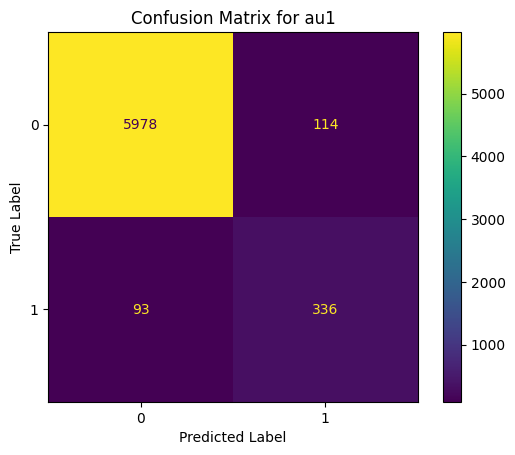

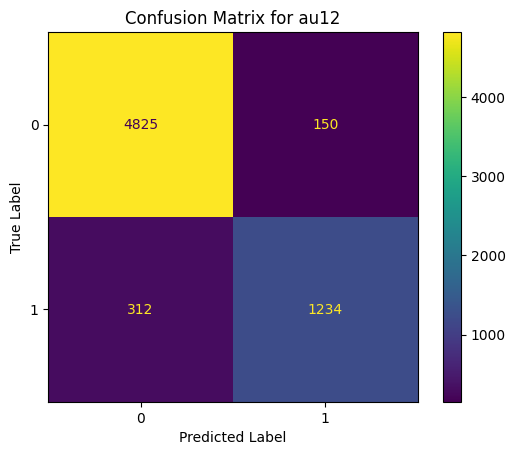

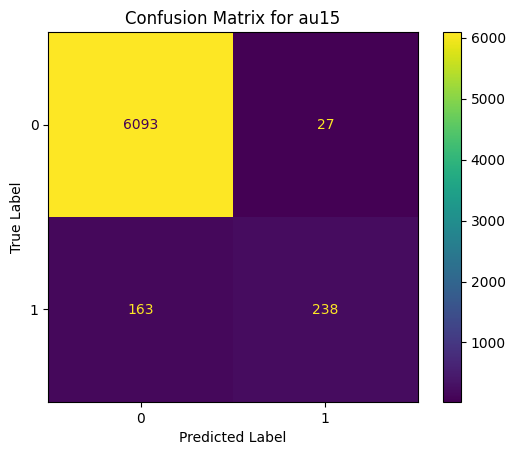

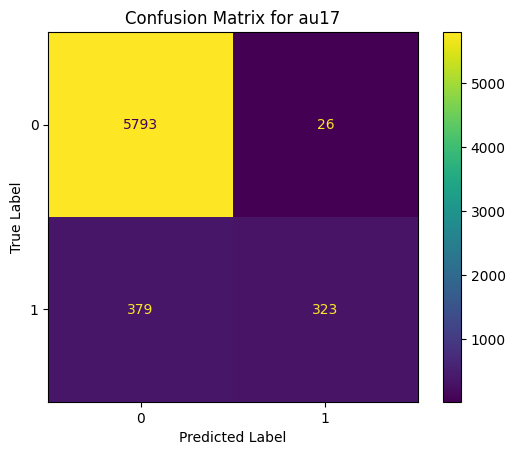

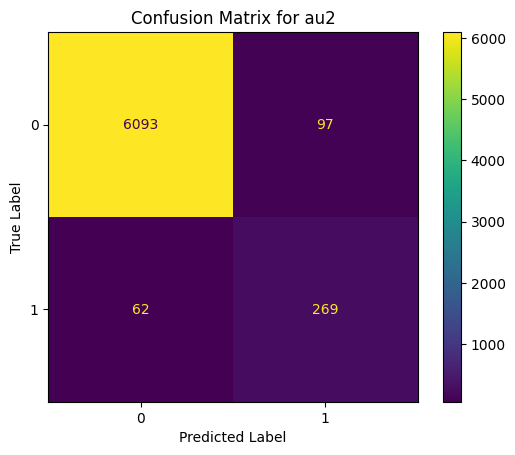

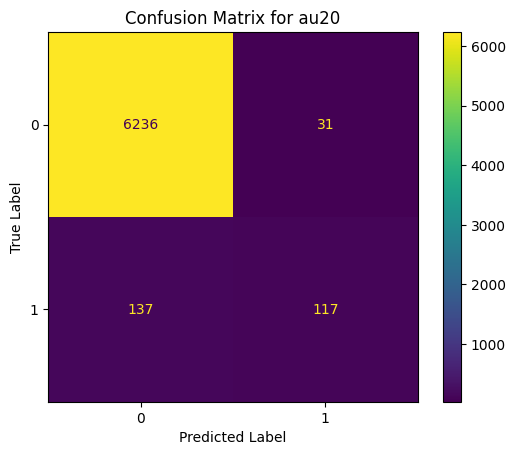

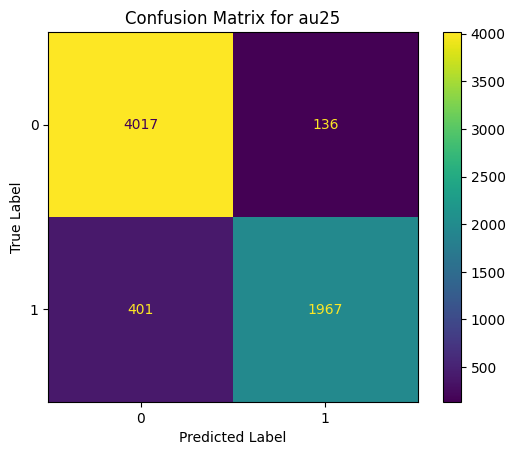

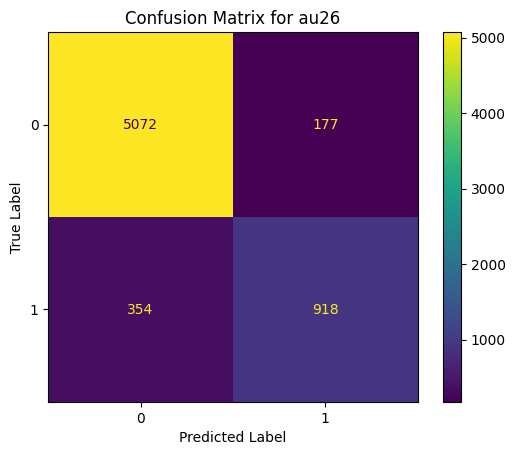

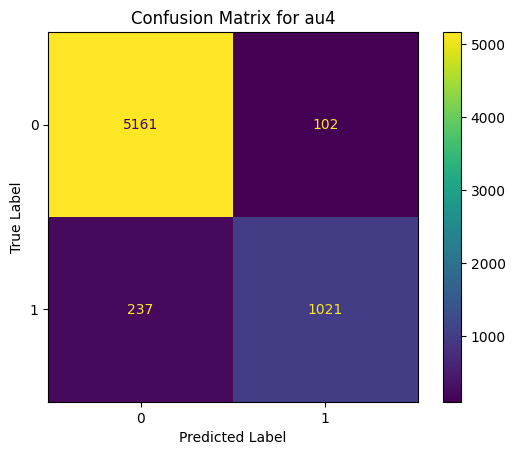

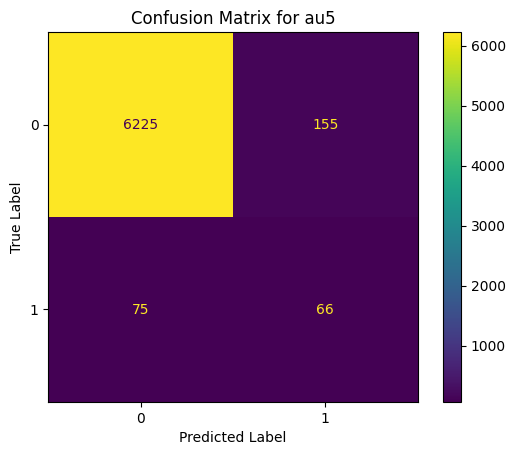

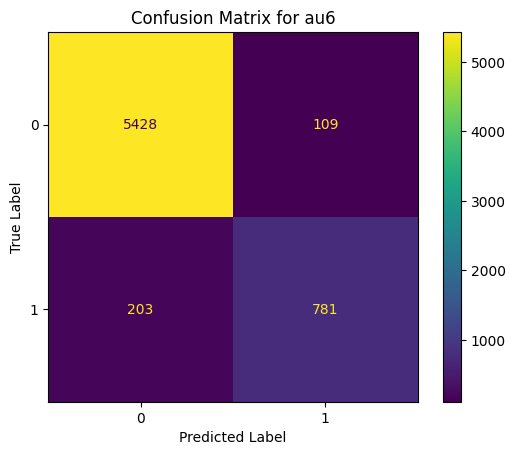

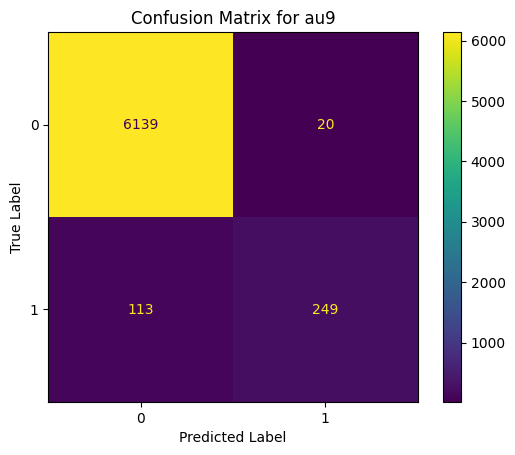

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report 
import matplotlib.pyplot as plt
for i in range(12):
    cm = confusion_matrix(y_test[:,i], pred[:,i])

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    # Customize the plot (optional)
    plt.title(f"Confusion Matrix for {au[i]}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

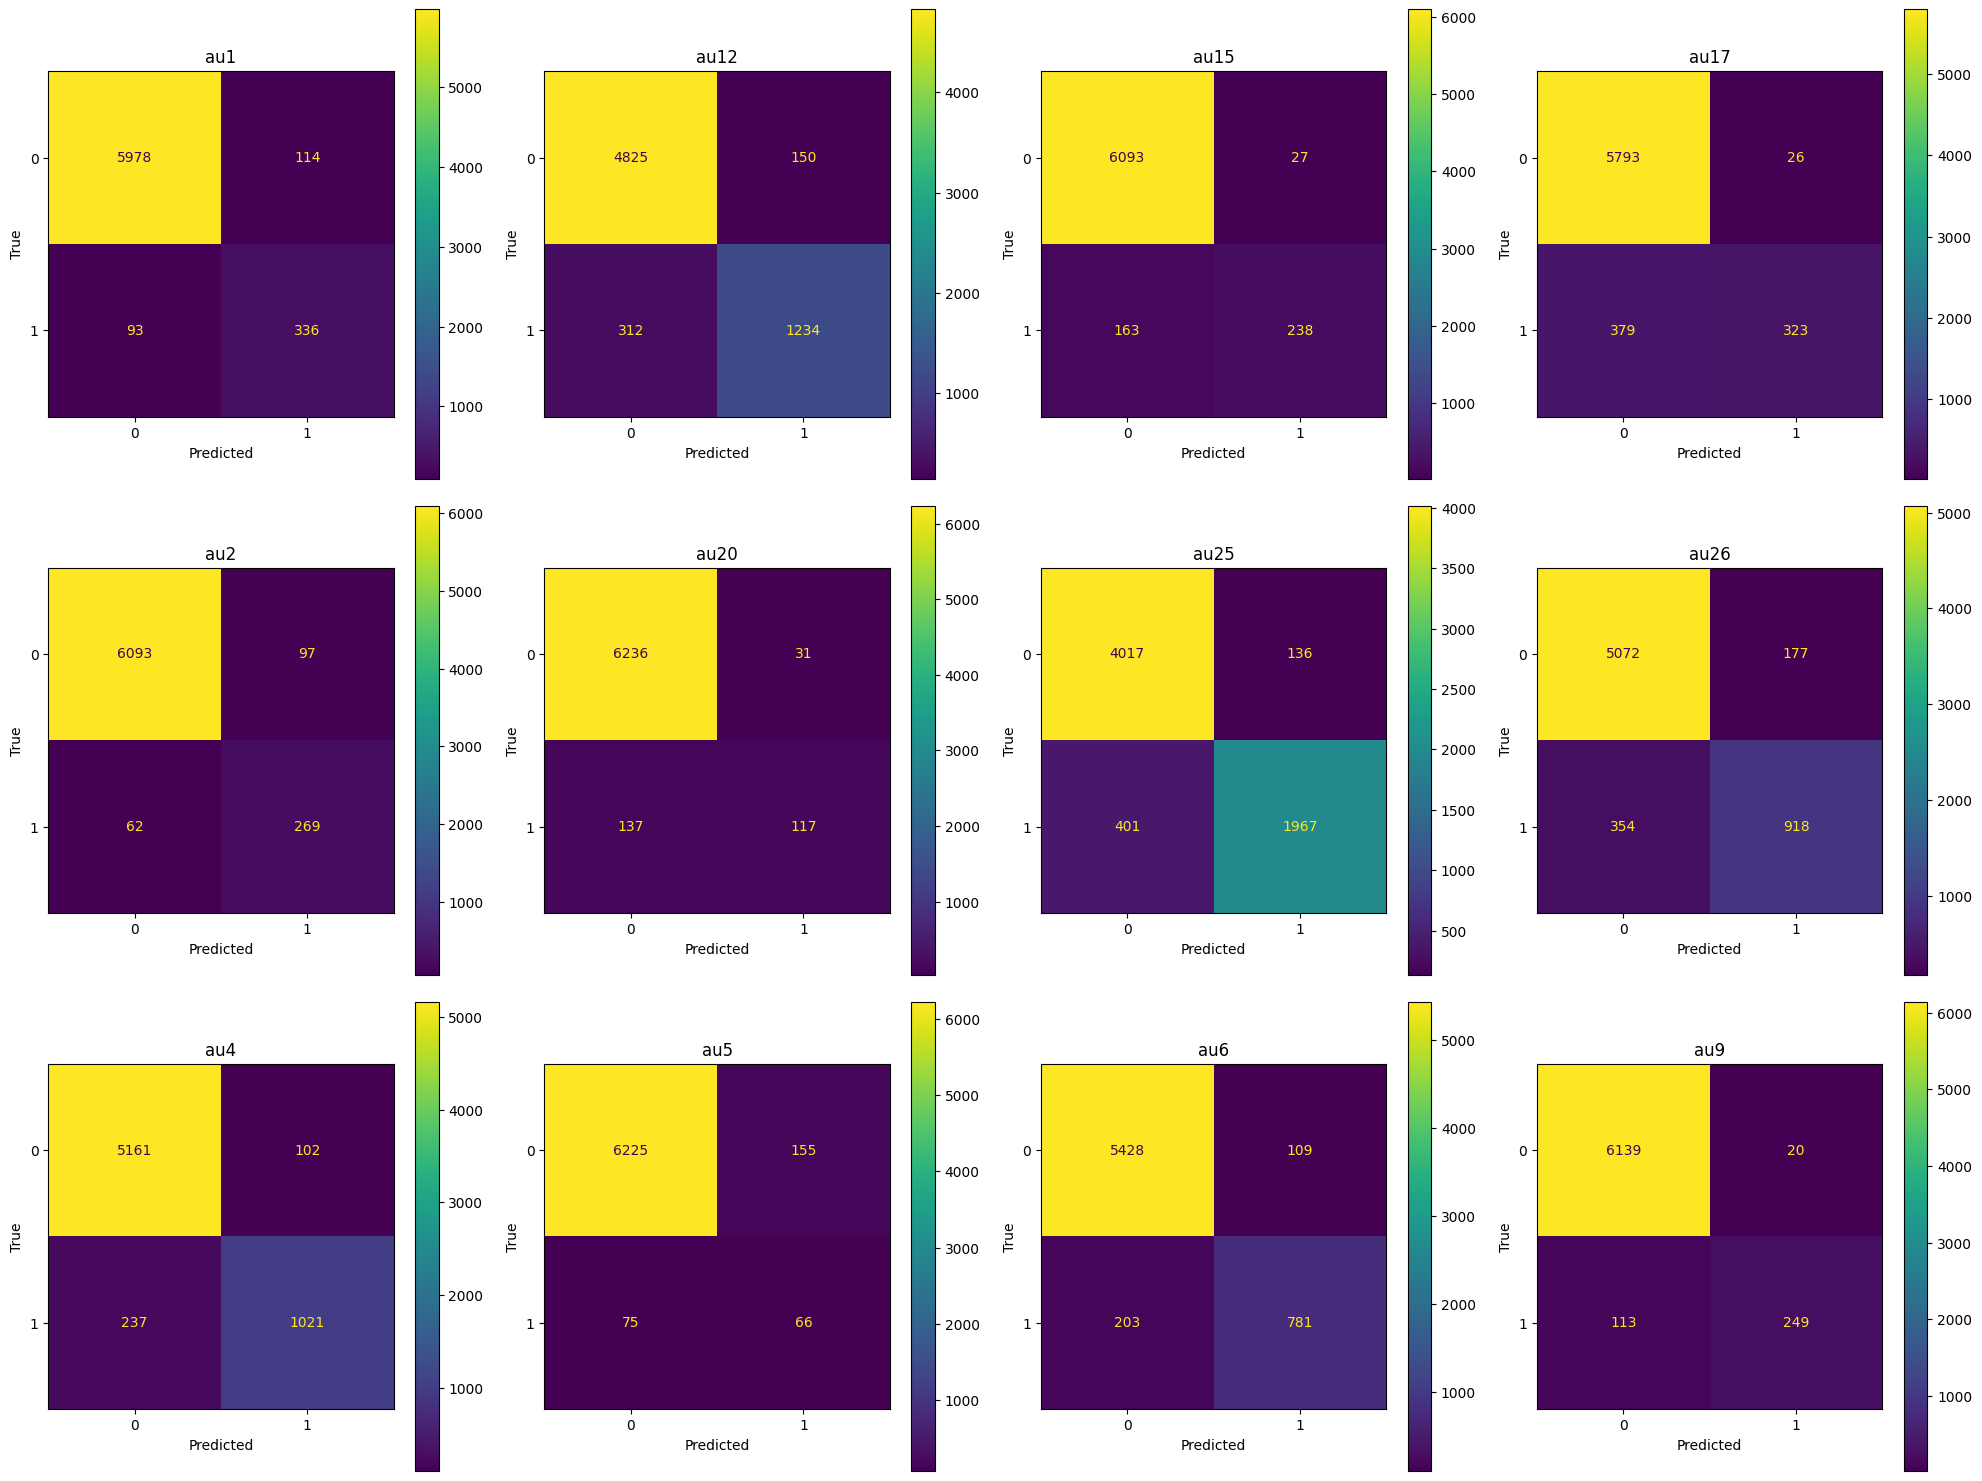

<Figure size 640x480 with 0 Axes>

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and pred are numpy arrays of shape (num_samples, 12)

# Define the number of rows and columns for the subplots grid
n_rows = 3
n_cols = 4

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each label and plot the confusion matrix in the corresponding subplot
for i in range(12):
    cm = confusion_matrix(y_test[:,i], pred[:,i])

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='viridis')
    
    # Customize the plot
    axes[i].set_title(f"{au[i]}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a single image
plt.savefig("all_confusion_matrices.png")

# Show the plot (optional)
plt.show()

# Clear the figure
plt.clf()
